<a href="https://colab.research.google.com/github/Giffy/Mobility_AIBCN/blob/master/3_Dataset_creation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Install libraries (if required)

##  Connect to Google Drive

In [1]:
# Check is Link to Drive is OK
google = !if [ -d 'GDrive/' ]; then echo "1" ; else echo "0"; fi
if (google[0] is '0' ):
  from google.colab import drive
  drive.mount('/content/GDrive/')
!if [ -d 'GDrive/' ]; then echo "Connection to Google drive successful" ; else echo "Error to connect to Google drive"; fi

Connection to Google drive successful


##  Load data

In [2]:
# Download previously cleaned data from 'Github'
!pip install wget
import wget
url = 'https://raw.githubusercontent.com/Giffy/Mobility_AIBCN/master/dataset/coverageCat.tar.gz'
filename = wget.download(url)

# Extract tar file
import tarfile
tf = tarfile.open( filename )
tf.extractall()

##  Load data

In [3]:
import pandas as pd

# load data
df = pd.read_csv('coverageCat.csv')
df.head()

,Activitat,Day,Hour,Latitude,Longitude,Month,Weekday,Year,_id
0,IN_VEHICLE,16,7,41.3930,2.1295,10,5,2015,ObjectId(5c12776e6ca61fc6f8bf69d6)
1,ON_FOOT,16,7,41.4450,2.1900,10,5,2015,ObjectId(5c12776e6ca61fc6f8bf69da)
2,IN_VEHICLE,16,7,41.3940,2.1280,10,5,2015,ObjectId(5c12776e6ca61fc6f8bf69e6)
3,TILTING,16,7,41.4475,2.2440,10,5,2015,ObjectId(5c12776e6ca61fc6f8bf69e8)
4,IN_VEHICLE,16,7,41.3955,2.1260,10,5,2015,ObjectId(5c12776e6ca61fc6f8bf69f0)


##  Generate dataset graphics 

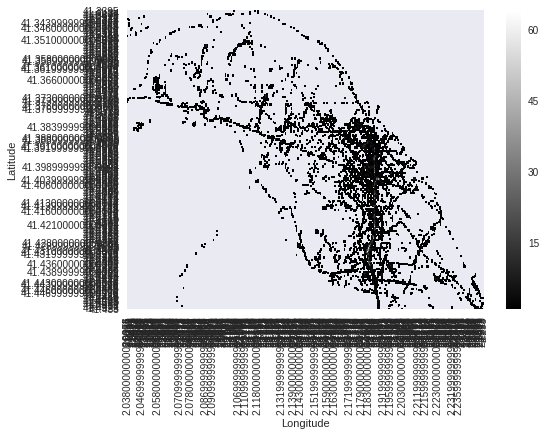

In [17]:
# Sample of plotting graphic with seaborn
# plot of Barcelona the 11th September of 2015

df0 = df[ (df['Year']== 2015) & (df['Month']== 9) & (df['Day']== 11)]
df0 = df0.groupby(['Latitude','Longitude'], as_index= False).count()           
result = df0.pivot (index='Latitude' , columns='Longitude', values='Day')

import seaborn
import seaborn as sns
sns_plot = seaborn.heatmap(result, cmap = 'gray')
fig = sns_plot.get_figure()
fig.savefig("output.png")

In [0]:
# Iteration to create the dataset of graphics
years = [2015, 2016, 2017]
months = [1,2,3,4,5,6,7,8,9,10,11,12]
days = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
weekdays = [1,2,3,4,5]
manana = [7,8,9,10,11]
tarde = [16,17,18,19,20]

hours = manana

df0 = df[df['Activitat']=='IN_VEHICLE']
df0 = df0[(df0['Weekday']!=6) & (df0['Weekday']!=7)]
df0 = df0[(df0['Hour'].isin(hours))]

for year in years:  
  df2 = df0[df0['Year']==year]  
  for month in months:
    df3 = df2[df2['Month']==month]
    for day in days:
          df4 = df3[df3['Day']==day]
          df5 = df4.groupby(['Latitude','Longitude'], as_index= False).count()           
          result = df5.pivot (index='Latitude' , columns='Longitude', values='Day')
          try:
            sns_plot = seaborn.heatmap(result, cmap = 'gray')
            fig = sns_plot.get_figure()
            if 10 in hours:
              periodo = 'M'
            else:
              periodo = 'T'
            filename = str(year) + '_' + str(month) + '_' + str(day) + '_' + periodo + '.png' 
            fig.savefig( filename )
          except:
            pass


## Plotting data sample with Folium

In [0]:
df0 = df[ (df['Year']== 2015) & (df['Month']== 9) & (df['Day']== 11)]
df0 = df0.groupby(['Latitude','Longitude'], as_index= False).count()           

latitude = df0['Latitude'][:]
longitude = df0['Longitude'][:]
total = df0['Day'][:]

In [20]:
!pip install folium geopandas             # Install folium for map visualization

import folium                             # Library to create the map
from folium import plugins                # plugin to create a heatmap

In [38]:
center_lat = 41.42
center_lon = 2.18

locationmap = folium.Map(location=[ center_lat , center_lon ], zoom_start=13) #, width=800, height=600 )
locationmap.add_child(plugins.HeatMap(zip(latitude, longitude, total), radius = 12))

locationmap